In [121]:
#import library
import re
import sqlite3
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
conn = sqlite3.connect('data_tweet.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[]


In [123]:
path_result = 'Result_Data/cleansed_file.csv'
df_tweet = pd.read_csv(path_result,encoding='iso-8859-1')


In [140]:
# menghitung karakter dari kolom new_Tweet sebelum di cleansing abusive
df_tweet['total_Character_NewTweet'] = df_tweet['Tweet'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

#total kata kolom new_Tweet sebelum di cleansing abusiv
df_tweet['total_word_cleansing'] = df_tweet['Tweet'].apply(lambda sent: len(sent.split(' ')) if isinstance(sent, str) else np.nan)

df_tweet

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,new_Tweet,total_Character_NewTweet,total_word_cleansing
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu gue bergau...,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku dan ku tau matamu tapi dilihat da...,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum ce sudah kelihatan nya dari awal tambah ...,89,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu kamu yang sekata...,61,10
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak,28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati tidak dan lagi bosan duh,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...,135,22


In [141]:
Wordbefore_cleansing_abusive = df_tweet['total_word_cleansing'].sum()
Wordbefore_cleansing_abusive

227588

In [142]:
Charbefore_cleansing_abusive = df_tweet['total_Character_NewTweet'].sum()
Charbefore_cleansing_abusive

1505054

In [143]:
path_kamus_abusive = 'Dictionary_Challenges/abusive.csv'
df_kamus_abusive = pd.read_csv(path_kamus_abusive, encoding='iso-8859-1')

# Menggunakan indeks numerik untuk merujuk ke kolom
abusive_dict_map = dict(df_kamus_abusive.iloc[:, 0])



In [ ]:
#Cleansing Data

In [149]:
# Fungsi untuk menghapus kata abusive dari tweet
def remove_abusive(tweet):
    # Pastikan tweet adalah string
    if isinstance(tweet, str):
        for kata in abusive_dict_map.values():
            tweet = tweet.replace(kata, '')
    return tweet

# Mengaplikasikan fungsi hapus_kata pada kolom new_Tweet
df_tweet['new_Tweet'] = df_tweet['new_Tweet'].apply(remove_abusive)

# menghitung karakter dari kolom new_Tweet setelah di cleansing abusive
df_tweet['total_Character_NewTweet'] = df_tweet['new_Tweet'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

#total kata kolom new_Tweet setelah di cleansing abusive
df_tweet['total_word_cleansing'] = df_tweet['new_Tweet'].apply(lambda sent: len(sent.split(' ')) if isinstance(sent, str) else np.nan)


# Menampilkan DataFrame yang telah diubah


In [145]:
WordAfter_cleansing_abusive = df_tweet['total_word_cleansing'].sum()
WordAfter_cleansing_abusive

240027.0

In [146]:
ChardAfter_cleansing_abusive  = data_tweet['total_Character_NewTweet'].sum()
ChardAfter_cleansing_abusive

1415929.0

In [147]:
# Membuat DataFrame dari total
total_data = {
    'Total': [Wordbefore_cleansing_abusive, Charbefore_cleansing_abusive, 
              WordAfter_cleansing_abusive, ChardAfter_cleansing_abusive
             ],
    'Category': ['Wordbefore_cleansing_abusive','Charbefore_cleansing_abusive', 
                 'WordAfter_cleansing_abusive', 'ChardAfter_cleansing_abusive']
}

total_df_cleansing_Abusive = pd.DataFrame(total_data)

# Menampilkan DataFrame
total_df_cleansing_Abusive



,Total,Category
0,227588.0,Wordbefore_cleansing_abusive
1,1505054.0,Charbefore_cleansing_abusive
2,240027.0,WordAfter_cleansing_abusive
3,1415929.0,ChardAfter_cleansing_abusive


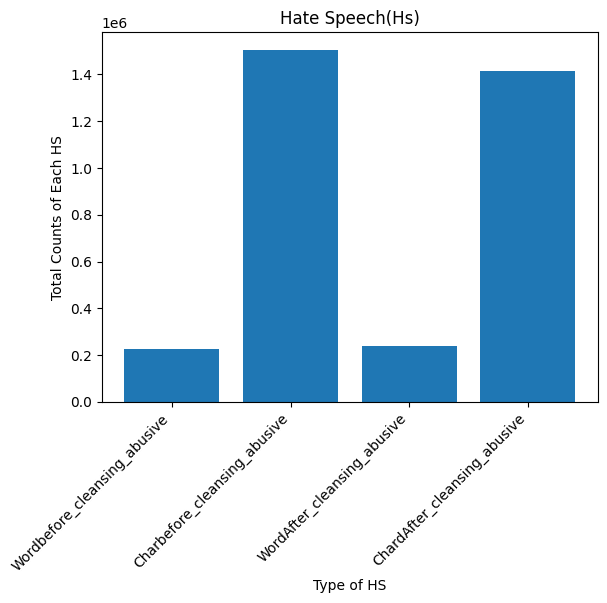

In [148]:
# Calculate total counts
total_counts = [
    Wordbefore_cleansing_abusive,
    Charbefore_cleansing_abusive, 
    WordAfter_cleansing_abusive,
    ChardAfter_cleansing_abusive
]
# Names of the totals
total_names = [
    'Wordbefore_cleansing_abusive',
    'Charbefore_cleansing_abusive', 
    'WordAfter_cleansing_abusive',
    'ChardAfter_cleansing_abusive'
]
# Create bar chart
plt.bar(total_names, total_counts)
plt.xlabel('Type of HS')
plt.ylabel('Total Counts of Each HS')
plt.title('Hate Speech(Hs)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
# terdapat perbedaan jumlah karakter dari setiap baris yang ada di kolom tweet dan kolom new tweet karena dalam cleansing data
#menghilangkan karakter dan kata yang berlebihan atau tidak diperlukan

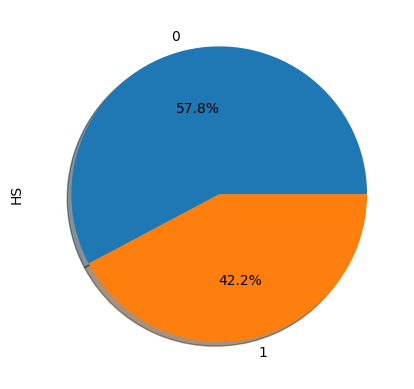

In [139]:
#pie chart yang menampilkan perbandingan presentasi tweets yang mengandung hatespeech(HS)
df_tweet['HS'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

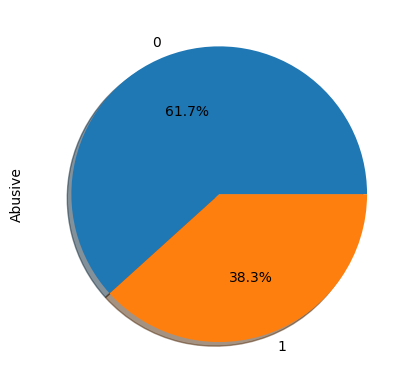

In [119]:
#pie chart yang menampilkan perbandingan presentasi tweets yang mengandung Abusive
data_tweet['Abusive'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [133]:
total_HS = (df_tweet['HS'] == 1).sum()
total_HS_Individual = (df_tweet['HS_Individual'] == 1).sum()
total_HS_Group = (df_tweet['HS_Group'] == 1).sum()
total_HS_Religion = (df_tweet['HS_Religion'] == 1).sum()
total_HS_Race = (df_tweet['HS_Race'] == 1).sum()
total_HS_Physical = (df_tweet['HS_Physical'] == 1).sum()
total_HS_Gender = (df_tweet['HS_Gender'] == 1).sum()
total_HS_Other = (df_tweet['HS_Other'] == 1).sum()
total_HS_Weak = (df_tweet['HS_Weak'] == 1).sum()
total_HS_Strong = (df_tweet['HS_Strong'] == 1).sum()

In [134]:
# Membuat DataFrame dari total
total_data = {
    'Total': [total_HS,total_HS_Individual, total_HS_Group, total_HS_Religion, total_HS_Race,
              total_HS_Physical, total_HS_Gender, total_HS_Other, total_HS_Weak, total_HS_Strong],
    'Category': ['HS','HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
                 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Strong']
}

total_df = pd.DataFrame(total_data)

# Menampilkan DataFrame
total_df


,Total,Category
0,5561,HS
1,3575,HS_Individual
2,1986,HS_Group
3,793,HS_Religion
4,566,HS_Race
5,323,HS_Physical
6,306,HS_Gender
7,3740,HS_Other
8,3383,HS_Weak
9,473,HS_Strong


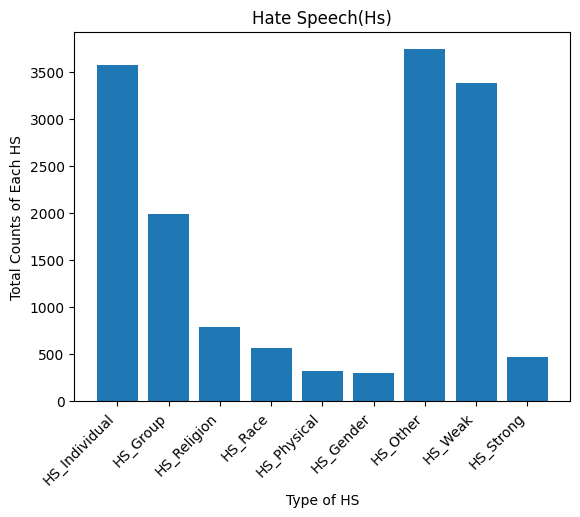

In [135]:
# Calculate total counts
total_counts = [
    total_HS_Individual,
    total_HS_Group,
    total_HS_Religion,
    total_HS_Race,
    total_HS_Physical,
    total_HS_Gender,
    total_HS_Other,
    total_HS_Weak,
    total_HS_Strong
]
# Names of the totals
total_names = [
    'HS_Individual',
    'HS_Group',
    'HS_Religion',
    'HS_Race',
    'HS_Physical',
    'HS_Gender',
    'HS_Other',
    'HS_Weak',
    'HS_Strong'
]
# Create bar chart
plt.bar(total_names, total_counts)
plt.xlabel('Type of HS')
plt.ylabel('Total Counts of Each HS')
plt.title('Hate Speech(Hs)')
plt.xticks(rotation=45, ha='right')
plt.show()

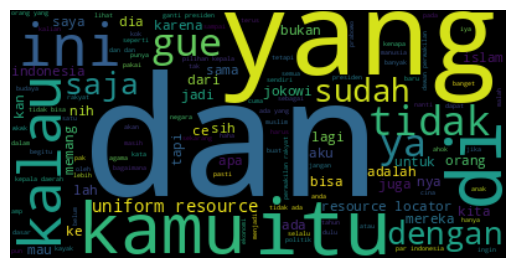

In [136]:
from wordcloud import WordCloud

# Gabungkan semua teks dari kolom 'new_Tweet' menjadi satu string
text = ' '.join(str(tweet)for tweet in data_tweet['new_Tweet'])

# Buat wordcloud
wordcloud = WordCloud().generate(text)

# Tampilkan plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

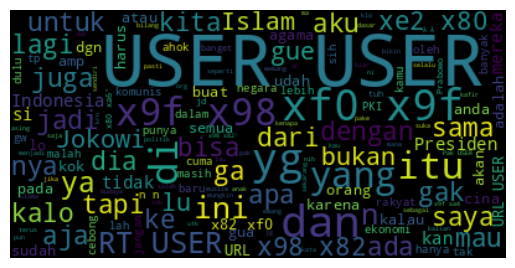

In [137]:
# Gabungkan semua teks dari kolom 'new_Tweet' menjadi satu string
text = ' '.join(str(tweet)for tweet in data_tweet['Tweet'])

# Buat wordcloud
wordcloud = WordCloud().generate(text)

# Tampilkan plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()